In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
import xgboost
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, balanced_accuracy_score, recall_score, f1_score
from sklearn.model_selection  import train_test_split
from sklearn.model_selection import GridSearchCV

In [147]:
df= pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [148]:
# drop the CLIENTNUM, and last 2 columns. That leaves us with 20 useful columns(19 features and the class)
df = df.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], axis =1)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
# Check for missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

**No missing values!**

# Exploratory Data Analysis

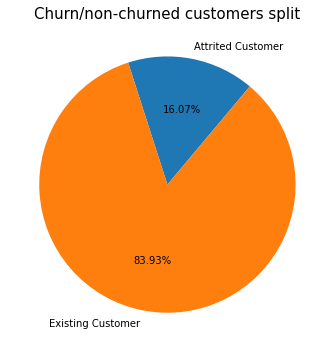

In [455]:
# 1- split churne vs not churned
plt.figure(figsize  =(5,5))
df.groupby('Attrition_Flag')['Attrition_Flag'].count().plot(kind ='pie', autopct = '%.2f%%',startangle  =50)
plt.ylabel('')
plt.title('Churn/non-churned customers split', fontsize = 15)
plt.tight_layout()
plt.savefig('pie2.png', dpi =160)
plt.show()

**As expected the number of churned customer is significantly smaller than the number of those who didn't churn**

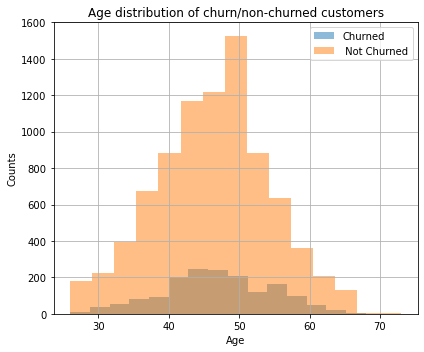

In [456]:
# Age distribution
plt.figure(figsize  =(6,5))
df.groupby('Attrition_Flag').Customer_Age.hist(bins = 15, alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Age distribution of churn/non-churned customers')
plt.legend(labels = ['Churned',' Not Churned'])
plt.tight_layout()
plt.savefig('age.png', dpi =160)
plt.show()

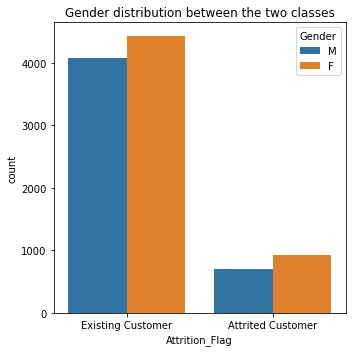

In [464]:
plt.figure(figsize  =(5,5))
plt.title('Gender distribution between the two classes')
sns.countplot(x = 'Attrition_Flag', data =df, hue = 'Gender')
plt.tight_layout()
plt.savefig('gender.png', dpi =160)
plt.show()

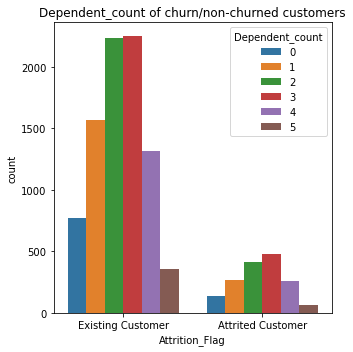

In [458]:
plt.figure(figsize  =(5,5))
plt.title('Dependent_count of churn/non-churned customers')
sns.countplot(x = 'Attrition_Flag', data =df, hue = 'Dependent_count')
plt.tight_layout()
plt.savefig('dependent.png', dpi =160)
plt.show()

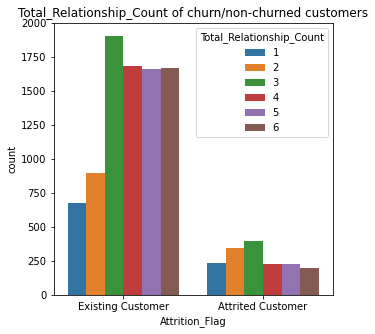

In [184]:
plt.figure(figsize  =(5,5))
plt.title('Total_Relationship_Count of churn/non-churned customers')
sns.countplot(x = 'Attrition_Flag', data =df, hue = 'Total_Relationship_Count')
plt.tight_layout()
plt.savefig('Relationship.png', dpi =160)
plt.show()

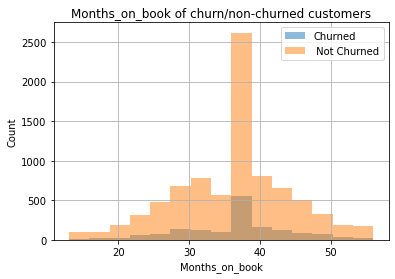

In [185]:
df.groupby('Attrition_Flag').Months_on_book.hist(bins = 15, alpha = 0.5)
plt.title('Months_on_book of churn/non-churned customers')
plt.xlabel('Months_on_book')
plt.ylabel('Count')
plt.legend(labels = ['Churned',' Not Churned'])
plt.tight_layout()
plt.savefig('Months.png', dpi =160)
plt.show()

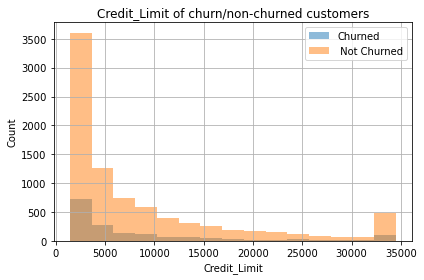

In [463]:
df.groupby('Attrition_Flag').Credit_Limit.hist(bins = 15, alpha = 0.5)
plt.xlabel('Credit_Limit')
plt.title('Credit_Limit of churn/non-churned customers')
plt.ylabel('Count')
plt.legend(labels = ['Churned',' Not Churned'])
plt.tight_layout()
plt.savefig('credit_limit.png', dpi =160)
plt.show()

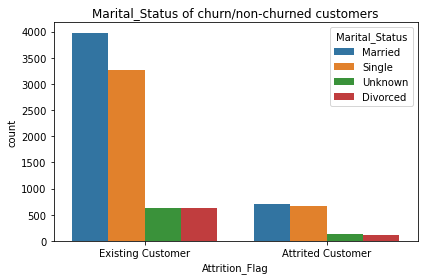

In [462]:
sns.countplot(x = 'Attrition_Flag', data =df, hue = 'Marital_Status')
plt.title('Marital_Status of churn/non-churned customers')
plt.tight_layout()
plt.savefig('marital status.png', dpi =160)
plt.show()

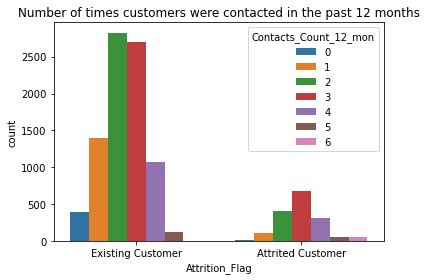

In [461]:
sns.countplot(x = 'Attrition_Flag', data =df, hue = 'Contacts_Count_12_mon') 
plt.title('Number of times customers were contacted in the past 12 months')
plt.tight_layout()
plt.savefig('contacts.png', dpi =160)
plt.show()

## Features Correlation

In [465]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [460]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,1.00,-0.12,0.79,-0.01,0.05,-0.02,0.00,0.01,0.00,-0.06,-0.05,-0.07,-0.01,0.01
Dependent_count,-0.12,1.00,-0.10,-0.04,-0.01,-0.04,0.07,-0.00,0.07,-0.04,0.03,0.05,0.01,-0.04
Months_on_book,0.79,-0.10,1.00,-0.01,0.07,-0.01,0.01,0.01,0.01,-0.05,-0.04,-0.05,-0.01,-0.01
Total_Relationship_Count,-0.01,-0.04,-0.01,1.00,-0.00,0.06,-0.07,0.01,-0.07,0.05,-0.35,-0.24,0.04,0.07
Months_Inactive_12_mon,0.05,-0.01,0.07,-0.00,1.00,0.03,-0.02,-0.04,-0.02,-0.03,-0.04,-0.04,-0.04,-0.01
Contacts_Count_12_mon,-0.02,-0.04,-0.01,0.06,0.03,1.00,0.02,-0.05,0.03,-0.02,-0.11,-0.15,-0.09,-0.06
Credit_Limit,0.00,0.07,0.01,-0.07,-0.02,0.02,1.00,0.04,1.00,0.01,0.17,0.08,-0.00,-0.48
Total_Revolving_Bal,0.01,-0.00,0.01,0.01,-0.04,-0.05,0.04,1.00,-0.05,0.06,0.06,0.06,0.09,0.62
Avg_Open_To_Buy,0.00,0.07,0.01,-0.07,-0.02,0.03,1.00,-0.05,1.00,0.01,0.17,0.07,-0.01,-0.54
Total_Amt_Chng_Q4_Q1,-0.06,-0.04,-0.05,0.05,-0.03,-0.02,0.01,0.06,0.01,1.00,0.04,0.01,0.38,0.04


### Categorical features - identification of the most informative ones 

In [206]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

In [212]:
df_object = df.select_dtypes(include = 'object')
df_object.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue


In [208]:
# preparing categorical features 
cat_feature = df_object.drop('Attrition_Flag', axis = 1)
lab = LabelEncoder()
cat_feature_enco = cat_feature.apply(lambda x: lab.fit_transform(x))

# getting the class
y = df_object['Attrition_Flag']

In [209]:
statistics, p_value = chi2(cat_feature_enco, y)

In [221]:
chi2_df = pd.DataFrame(p_value, index = cat_feature_enco.columns, columns =['p_value'])
chi2_df.sort_values('p_value')

,p_value
Gender,0.006368
Income_Category,0.115657
Marital_Status,0.253711
Card_Category,0.320692
Education_Level,0.560273


**Gender has the lowest p_value (=highest chi2 squared).**
Thus, we expect this feature to be critical for the prediction of the model 

### Numerical features - identification the most informative one

In [213]:
df_numerical = df.select_dtypes(exclude = 'object')
df_numerical.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [216]:
from sklearn.feature_selection import f_classif

In [218]:
stats, p_values_f = f_classif(df_numerical, y)

In [220]:
f_score_df = pd.DataFrame(p_values_f, index = df_numerical.columns, columns =['P-value'])
f_score_df.sort_values('P-value')

,P-value
Total_Trans_Ct,0.000000e+00
Total_Ct_Chng_Q4_Q1,1.647725e-195
Total_Revolving_Bal,6.630148e-160
Contacts_Count_12_mon,4.697490e-96
Avg_Utilization_Ratio,3.357689e-73
Total_Trans_Amt,1.857439e-65
Months_Inactive_12_mon,1.032664e-53
Total_Relationship_Count,4.829281e-52
Total_Amt_Chng_Q4_Q1,4.836643e-40
Credit_Limit,1.628536e-02


**Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Total_Revolving_Bal, Contacts_Count_12_mon, Avg_Utilization_Ratio are the 5 features with the lowest p_value.**
We expect them to be critical for the prediction of the model 

# Modeling 

## 1- Model 1: Xgboost Vanilla with all features, no grid search 

In [224]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [225]:
X = df.drop('Attrition_Flag', axis =1)
X = pd.get_dummies(X, drop_first =False)
X.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,0,0,1,0,0,0,1,0,0,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,0,0,0,0,1,0,1,0,0,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,0,0,0,1,0,0,1,0,0,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,0,0,0,0,1,0,1,0,0,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,0,0,1,0,0,0,1,0,0,0


In [236]:
y = np.where(df['Attrition_Flag'] == 'Existing Customer', 0,1)

In [237]:
X_train ,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [238]:
cla1 =xgboost.XGBClassifier(objective = 'binary:logistic', use_label_encoder=False)
cla1.fit(X_train,
        y_train,
        early_stopping_rounds = 10,
        eval_metric ='aucpr',
        eval_set= [(X_test, y_test)])

[0]	validation_0-aucpr:0.89261
[1]	validation_0-aucpr:0.90304
[2]	validation_0-aucpr:0.92128
[3]	validation_0-aucpr:0.92791
[4]	validation_0-aucpr:0.93531
[5]	validation_0-aucpr:0.94455
[6]	validation_0-aucpr:0.95211
[7]	validation_0-aucpr:0.95520
[8]	validation_0-aucpr:0.96056
[9]	validation_0-aucpr:0.96541
[10]	validation_0-aucpr:0.96734
[11]	validation_0-aucpr:0.96989
[12]	validation_0-aucpr:0.96942
[13]	validation_0-aucpr:0.96938
[14]	validation_0-aucpr:0.97116
[15]	validation_0-aucpr:0.97239
[16]	validation_0-aucpr:0.97307
[17]	validation_0-aucpr:0.97408
[18]	validation_0-aucpr:0.97408
[19]	validation_0-aucpr:0.97466
[20]	validation_0-aucpr:0.97543
[21]	validation_0-aucpr:0.97539
[22]	validation_0-aucpr:0.97585
[23]	validation_0-aucpr:0.97590
[24]	validation_0-aucpr:0.97575
[25]	validation_0-aucpr:0.97618
[26]	validation_0-aucpr:0.97639
[27]	validation_0-aucpr:0.97623
[28]	validation_0-aucpr:0.97610
[29]	validation_0-aucpr:0.97654
[30]	validation_0-aucpr:0.97716
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

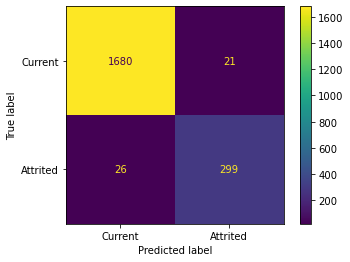

In [242]:
plot_confusion_matrix(cla1, X_test, y_test, 
                      values_format = 'd', 
                      display_labels =['Current', 'Attrited'] )

**Let's see how recall and balanced accuracy changes when scale_pos_weight increase**

In [348]:
balanced_accuracy = []
recall = []
ind = []
F1scores = []
for j in range(25):
    X_train ,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)
    rec = []
    accur = []
    F1 = []
    for i in range(1,11):
        ind.append(i)
        cla1b =xgboost.XGBClassifier(objective = 'binary:logistic', use_label_encoder=False, scale_pos_weight = i)
        cla1b.fit(X_train,
                y_train,
                verbose =0,
                early_stopping_rounds = 10,
                eval_metric ='aucpr',
                eval_set= [(X_test, y_test)])
        predict = cla1b.predict(X_test)
        
        accur.append(balanced_accuracy_score(y_test, predict, adjusted = True))
        rec.append(recall_score(y_test, predict))
        F1.append(f1_score (y_test, predict))
    balanced_accuracy.append(accur)
    recall.append(rec)
    F1scores.append(F1)

In [349]:
recall_array = np.array(recall)
balanced_accuracy_array= np.array(balanced_accuracy)
F1_array = np.array(np.array(F1scores))

In [350]:
recal_avg = np.mean(recall_array, axis = 0)
accuracy_avg = np.mean(balanced_accuracy_array, axis = 0)
F1_avg = np.mean(F1_array, axis = 0)

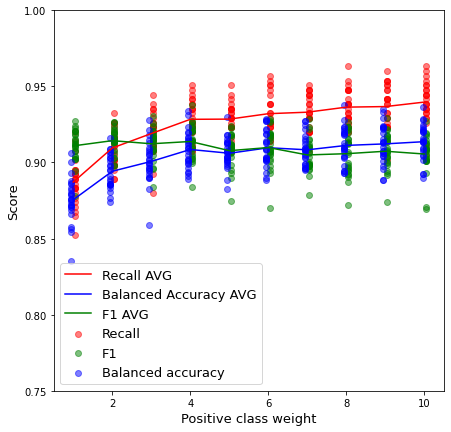

In [351]:
plt.figure(figsize = (7,7))
plt.scatter(np.array(ind)+0.05, recall, color = 'red', label= 'Recall', alpha =0.5)
plt.scatter(np.array(ind)+0.05, F1scores, color = 'green', label= 'F1', alpha =0.5)


plt.plot(np.arange(10)+1, recal_avg, color = 'red', label= 'Recall AVG')
plt.scatter(np.array(ind)-0.05, balanced_accuracy, color = 'blue', label= 'Balanced accuracy', alpha =0.5)
plt.plot(np.arange(10)+1, accuracy_avg, color = 'blue', label= 'Balanced Accuracy AVG')
plt.plot(np.arange(10)+1, F1_avg, color = 'green', label= 'F1 AVG')
plt.legend(fontsize = 13)
plt.xlabel('Positive class weight', fontsize =13)
plt.ylabel('Score', fontsize =13)
plt.ylim([0.75,1])
plt.show()
    

In [352]:
print(ind[np.argmax(recal_avg)])
print(ind[np.argmax(accuracy_avg)])
print(ind[np.argmax(F1_avg)])

10
10
2


scale_pos_weight = 2


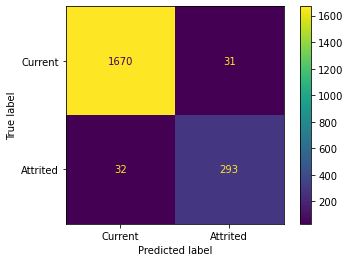

In [361]:
print( 'scale_pos_weight = 2')
cla1b2 =xgboost.XGBClassifier(objective = 'binary:logistic', use_label_encoder=False, scale_pos_weight = 2)
cla1b2.fit(X_train,
                y_train,
                verbose =0,
                early_stopping_rounds = 10,
                eval_metric ='aucpr',
                eval_set= [(X_test, y_test)])
    
plot_confusion_matrix(cla1b2, X_test, y_test, 
                      values_format = 'd',
                      display_labels =['Current', 'Attrited'] )

scale_pos_weight= 10


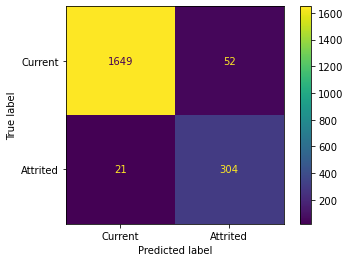

In [362]:
print( 'scale_pos_weight= 10')
cla1b10 =xgboost.XGBClassifier(objective = 'binary:logistic', use_label_encoder=False, scale_pos_weight = 10)
cla1b10.fit(X_train,
                y_train,
                verbose =0,
                early_stopping_rounds = 10,
                eval_metric ='aucpr',
                eval_set= [(X_test, y_test)])
    
plot_confusion_matrix(cla1b10, X_test, y_test, 
                      values_format = 'd', 
                      display_labels =['Current', 'Attrited'] )

**Let's select the scale_pos_weight value that gives the highest F1 score and highest recall for the grid search**

## 2- Model 1: Xgboost Vanilla with all features, WITH grid search 

In [376]:
classif = xgboost.XGBClassifier(objective = 'binary:logistic', use_label_encoder=False)

In [368]:
params = {'max_depth':[None, 4, 8],
         'learning_rate': [0.2, 0.3, 0.4],
         'reg_lambda' : [0.1, 0.25, 0.5 ],
         'gamma' : [1 , 2 ,10],
         'scale_pos_weight': [2,10]}

In [369]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [370]:
grid = GridSearchCV(classif, param_grid = params, cv = 6)
grid.fit(X_train, y_train)

[12:12:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:12:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:13:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:13:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:13:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:14:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:14:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:14:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:14:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:14:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:14:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:14:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:14:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:14:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:14:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:14:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:14:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:15:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:15:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:15:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:15:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:15:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:15:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:15:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:15:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:15:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:15:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:15:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:15:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:15:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:15:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:16:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:16:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:16:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:17:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:17:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:17:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:17:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:18:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:18:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:18:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:18:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:18:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:18:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:18:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:18:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:18:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:18:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:18:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:18:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:18:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:18:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:18:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:18:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:19:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:19:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:19:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:19:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:19:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:19:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:19:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:19:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:19:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:19:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:19:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:19:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:20:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:20:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:20:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:20:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:21:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:21:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:21:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:21:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:22:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=6,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [371]:
grid.best_params_

{'gamma': 1,
 'learning_rate': 0.3,
 'max_depth': 4,
 'reg_lambda': 0.1,
 'scale_pos_weight': 2}

In [374]:
final_model = xgboost.XGBClassifier(objective = 'binary:logistic', use_label_encoder=False, scale_pos_weight = 2)
final_model.fit(X_train, y_train,
               verbose =10,
                early_stopping_rounds = 10,
                eval_metric ='aucpr',
                eval_set= [(X_test, y_test)])

[0]	validation_0-aucpr:0.83495
[10]	validation_0-aucpr:0.94755
[20]	validation_0-aucpr:0.95744
[30]	validation_0-aucpr:0.96220
[40]	validation_0-aucpr:0.96444
[50]	validation_0-aucpr:0.96638
[60]	validation_0-aucpr:0.96786
[70]	validation_0-aucpr:0.96739
[72]	validation_0-aucpr:0.96744


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

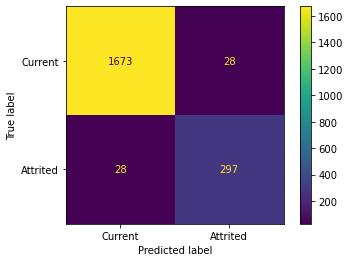

In [375]:
plot_confusion_matrix(final_model, X_test, y_test, 
                      values_format = 'd', 
                      display_labels =['Current', 'Attrited'] )

In [418]:
y_pred = final_model.predict(X_test)
print('Balanced accuracy',balanced_accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('f1_score', f1_score(y_test, y_pred))


Balanced accuracy 0.9486926242481798
Recall 0.9138461538461539
f1_score 0.9138461538461538


# Features importance

In [377]:
import shap

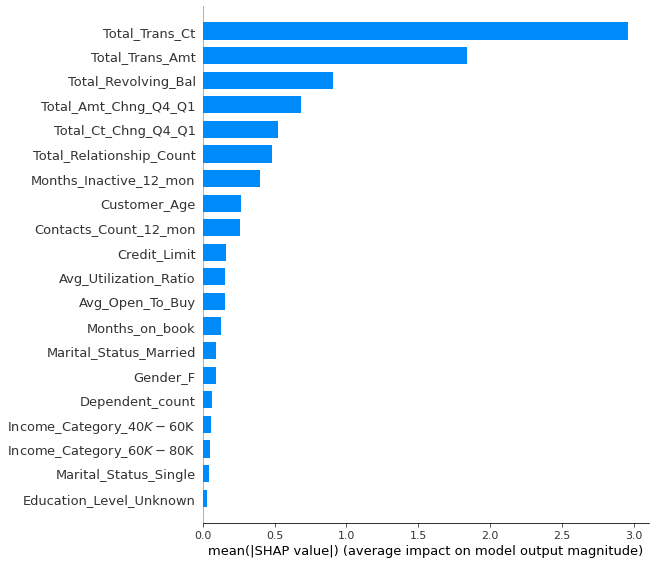

In [472]:
shap_values = shap.TreeExplainer(final_model).shap_values(X_test)
shap.summary_plot(shap_values, X_train, plot_type="bar", show = False)
plt.savefig('summary.png', dpi =120)

**The most predictive features are those one with highest f or chi2 statistics**

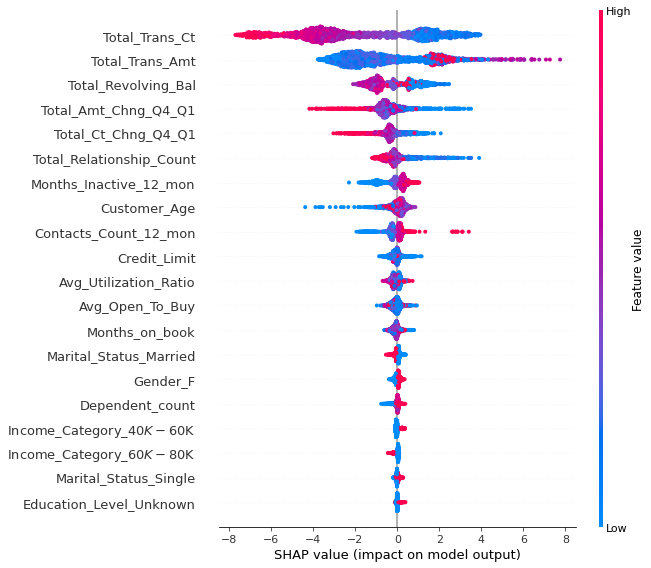

In [473]:
shap.summary_plot(shap_values, X_test,show =False)
plt.savefig('summary_x_test.png', dpi =120)

**Key takeaways:**
- higher total_trans_ct, the lower the probability the customer churns
- higher the transaction amount, the higher the probability the customer churns
- higher the change for the Q4-Q1, the lower the probability the customer churns

It was interesting to note that the more the client is contacted, the higher the chance he/she will churn. We cannot establish the direction of this phenomenon. Clients who churned were approached more often because they were predicted to cancel some services in the future or to solve issues. It is also possible that contacting the customers too much may annoying them to the point they cut ties with the firm. 

In [382]:
y_prob = final_model.predict_proba(X_test)
y_prob

array([[9.9975413e-01, 2.4587344e-04],
       [9.9840343e-01, 1.5965491e-03],
       [9.9982387e-01, 1.7610556e-04],
       ...,
       [9.9952656e-01, 4.7343445e-04],
       [9.9948889e-01, 5.1111536e-04],
       [9.9911505e-01, 8.8492333e-04]], dtype=float32)

In [386]:
correctly_classified_positive_class = np.argmax(y_prob[:,0])
correctly_classified_negative_class = np.argmax(y_prob[:,1])

In [407]:
shap.initjs()

Best POSITIVE classified entry


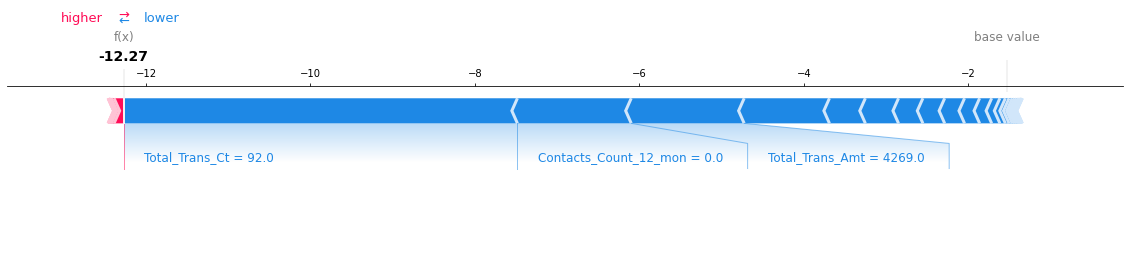

In [478]:
print('Best POSITIVE classified entry')
explainerModel = shap.TreeExplainer(final_model)
shap_values_Model = explainerModel.shap_values(X_test.iloc[[correctly_classified_positive_class]])
shap.force_plot(explainerModel.expected_value, 
                shap_values_Model[-1], 
                X_test.iloc[[correctly_classified_positive_class]], show=False, matplotlib=True)
plt.savefig('force_plot positive.png', dpi =120)

Best NEGATIVE classified entry


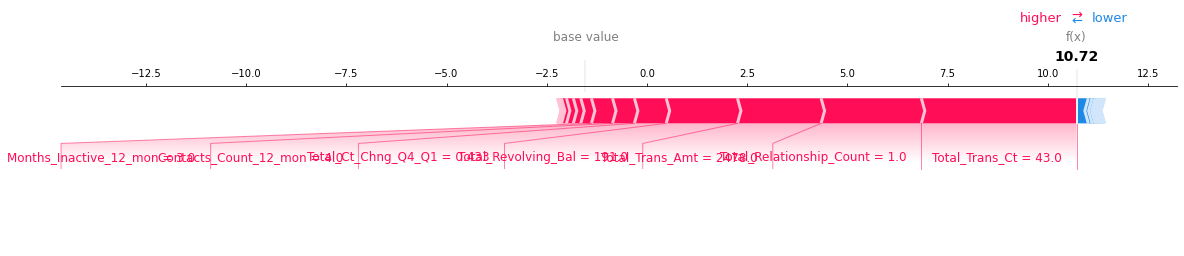

In [477]:
print('Best NEGATIVE classified entry')
shap_values_Model = explainerModel.shap_values(X_test.iloc[[correctly_classified_negative_class]])
shap.force_plot(explainerModel.expected_value, 
                shap_values_Model[-1], 
                X_test.iloc[[correctly_classified_negative_class]], show=False, matplotlib=True)
plt.savefig('force_plot negative.png', dpi =120)

RANDOM Datapoint : 60 


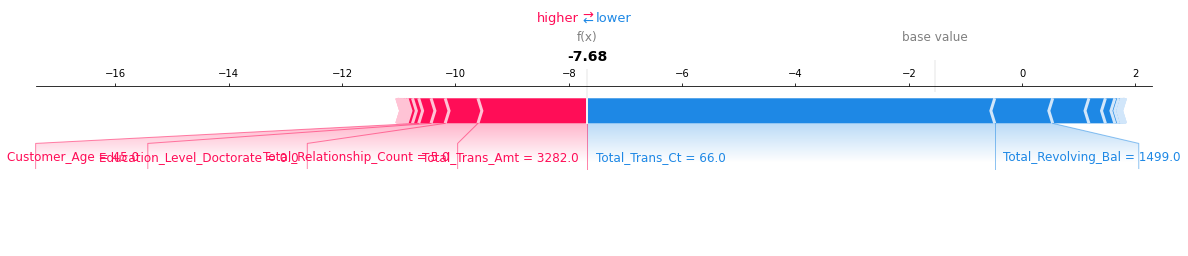

In [484]:
print('RANDOM Datapoint : 60 ')
shap_values_Model = explainerModel.shap_values(X_test.iloc[[60]])
shap.force_plot(explainerModel.expected_value, 
                shap_values_Model[-1], 
                X_test.iloc[[20]], show=False, matplotlib= True)

plt.savefig('random.png', dpi =120)

**What about a missclassified datapoint ?**

In [439]:
ys = np.concatenate([y_pred.reshape(-1,1), y_test.reshape(-1,1)], axis = 1)
diff = np.where(ys[:,0]==ys[:,1], 0,1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [442]:
index_error = [x for x in range(y_pred.shape[0]) if diff[x] ==1]
index_error

[15,
 116,
 129,
 167,
 232,
 233,
 241,
 377,
 492,
 505,
 552,
 578,
 597,
 640,
 708,
 767,
 799,
 800,
 820,
 867,
 906,
 913,
 966,
 970,
 1010,
 1028,
 1056,
 1124,
 1161,
 1164,
 1187,
 1204,
 1215,
 1222,
 1227,
 1249,
 1251,
 1305,
 1321,
 1324,
 1374,
 1383,
 1395,
 1468,
 1472,
 1505,
 1516,
 1549,
 1552,
 1655,
 1713,
 1760,
 1790,
 1794,
 1847,
 1891]

In [500]:
false_negative = [x for x in range(y_pred.shape[0]) if diff[x] ==1 and y_pred[x] == 0]
false_negative

[15,
 129,
 232,
 377,
 492,
 552,
 578,
 597,
 640,
 767,
 799,
 820,
 867,
 906,
 966,
 970,
 1010,
 1028,
 1056,
 1124,
 1187,
 1204,
 1227,
 1251,
 1383,
 1395,
 1472,
 1790]

RANDOM Misclassfied Datapoint : 970 
prediction is 0 ; real class is 1


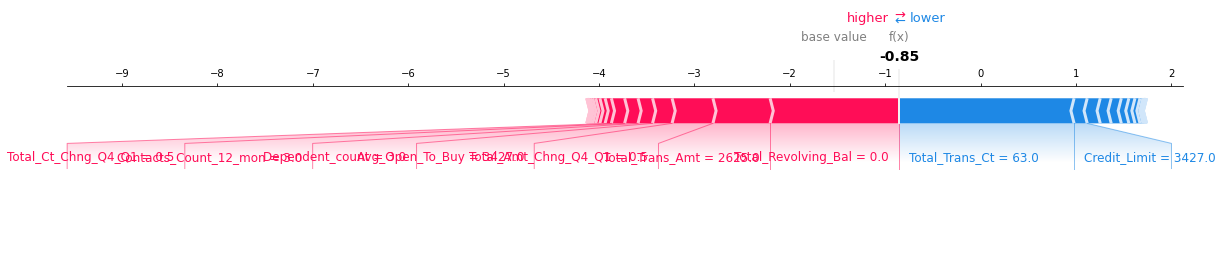

In [503]:
print('RANDOM Misclassfied Datapoint : 970 ')
print('prediction is', y_pred[970], '; real class is', y_test[970] )

shap_values_Model = explainerModel.shap_values(X_test.iloc[[970]])
shap.force_plot(explainerModel.expected_value, 
                shap_values_Model[-1], 
                X_test.iloc[[970]],show=False, matplotlib =True)

plt.savefig('missclas-1.png', dpi =120)

RANDOM Misclassfied Datapoint : 1204 
prediction is 0 ; real class is 1


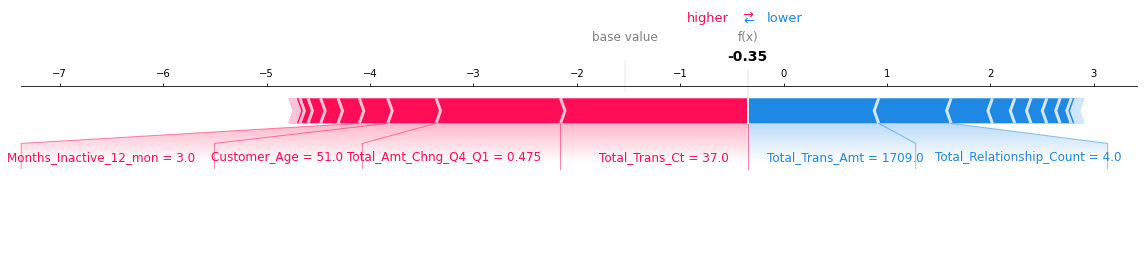

In [502]:
print('RANDOM Misclassfied Datapoint : 1204 ')
print('prediction is', y_pred[1204], '; real class is', y_test[1204] )
shap_values_Model = explainerModel.shap_values(X_test.iloc[[1204]])
shap.force_plot(explainerModel.expected_value, 
                shap_values_Model[-1], 
                X_test.iloc[[1204]],show=False, matplotlib =True)
plt.savefig('missclas-2.png', dpi =120)